<a href="https://colab.research.google.com/github/ale22toni/ISPC-Ciencia-de-Datos/blob/main/Examen_V1parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sklearn as sk
import os as os
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import mpl_toolkits.mplot3d  # noqa: F401
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'



# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets

# Diabetes dataset

In [90]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos = data1
datos






,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [92]:
#tipos de columnas
#=============================================================================
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  442 non-null    float64
 1   age     442 non-null    float64
 2   sex     442 non-null    float64
 3   bmi     442 non-null    float64
 4   bp      442 non-null    float64
 5   s1      442 non-null    float64
 6   s2      442 non-null    float64
 7   s3      442 non-null    float64
 8   s4      442 non-null    float64
 9   s5      442 non-null    float64
 10  s6      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [93]:
# Dimensiones del dataset
# ==============================================================================
datos.shape


(442, 11)

In [94]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

target    0
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
dtype: int64

In [189]:
datos.head


<bound method NDFrame.head of      target       age       sex       bmi        bp        s1        s2  \
0     151.0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1      75.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2     141.0  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3     206.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4     135.0  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   
..      ...       ...       ...       ...       ...       ...       ...   
437   178.0  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
438   104.0 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
439   132.0  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840   
440   220.0 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
441    57.0 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

           s3        s4        s5        s6  
0   -0.043401 -0.002592

In [101]:
# Correlación entre columnas numéricas
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
54,s2,s1,0.896663,0.896663
45,s1,s2,0.896663,0.896663
67,s3,s4,-0.738493,0.738493
76,s4,s3,-0.738493,0.738493
57,s2,s4,0.659817,0.659817
75,s4,s2,0.659817,0.659817
78,s4,s5,0.617857,0.617857
87,s5,s4,0.617857,0.617857
74,s4,s1,0.542207,0.542207
47,s1,s4,0.542207,0.542207


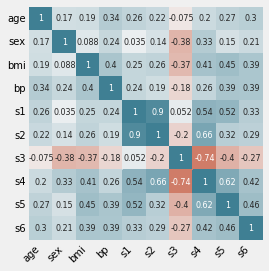

In [102]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [110]:
datos.shape

(442, 11)

In [109]:
# Variables numéricas
# ==============================================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,152.133484,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,77.093005,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,25.000000,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,87.000000,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,140.500000,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,211.500000,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,346.000000,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


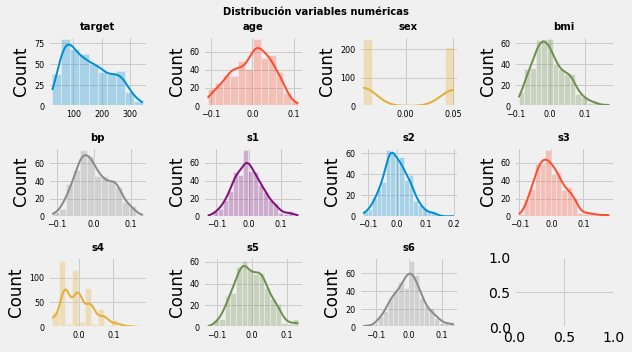

In [197]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

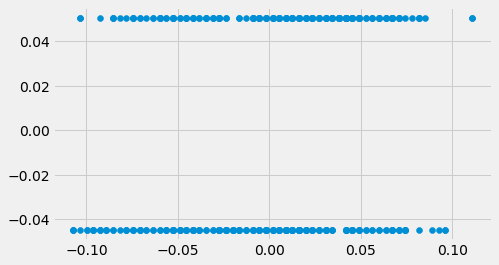

In [190]:
plt.scatter(datos['age'],datos['sex'])

In [195]:
# Valores observados de magnesium
# ==============================================================================
datos.sex.value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [220]:
# FUNCION DE DIAGNOSTICOS DE RESIDUOS y GRAFICOS
def diagnostic_garbages(y_train, prediccion_train,residuos_train ):
  ''' 
  Se reciben los siguientes parametros
  y_train = vector de salida de entrenamiento
  prediccion_train =  resultado de diagnostico de errores
  residuos_train = resultado de diagnostico de errores
  '''
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

  axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                  'k--', color = 'black', lw=2)
  axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
  axes[0, 0].set_xlabel('Real')
  axes[0, 0].set_ylabel('Predicción')
  axes[0, 0].tick_params(labelsize = 7)

  axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[0, 1].set_xlabel('id')
  axes[0, 1].set_ylabel('Residuo')
  axes[0, 1].tick_params(labelsize = 7)

  sns.histplot(
      data    = residuos_train,
      stat    = "density",
      kde     = True,
      line_kws= {'linewidth': 1},
      color   = "firebrick",
      alpha   = 0.3,
      ax      = axes[1, 0]
  )

  axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                      fontweight = "bold")
  axes[1, 0].set_xlabel("Residuo")
  axes[1, 0].tick_params(labelsize = 7)


  sm.qqplot(
      residuos_train,
      fit   = True,
      line  = 'q',
      ax    = axes[1, 1], 
      color = 'firebrick',
      alpha = 0.4,
      lw    = 2
  )
  axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[1, 1].tick_params(labelsize = 7)

  axes[2, 0].scatter(prediccion_train, residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
  axes[2, 0].set_xlabel('Predicción')
  axes[2, 0].set_ylabel('Residuo')
  axes[2, 0].tick_params(labelsize = 7)

  # Se eliminan los axes vacíos
  fig.delaxes(axes[2,1])

  fig.tight_layout()
  plt.subplots_adjust(top=0.9)
  fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

                            OLS Regression Results                            
Dep. Variable:       petal width (cm)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1103.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.94e-55
Time:                        23:39:27   Log-Likelihood:                 13.046
No. Observations:                 100   AIC:                            -22.09
Df Residuals:                      98   BIC:                            -16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3549      0.05

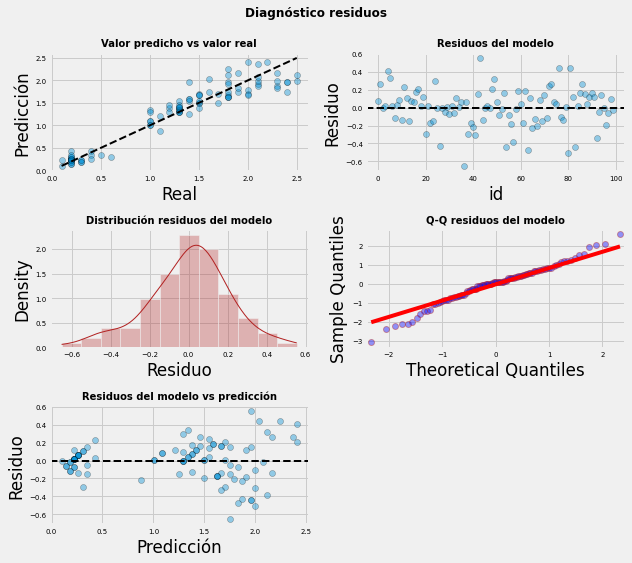

In [224]:
# DIVISION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print(intervalos_ci)

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)

In [238]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
96,1.377379,0.021977,1.333767,1.420991,0.949421,1.805337
105,2.367248,0.040689,2.286502,2.447994,1.933928,2.800567
66,1.501113,0.023074,1.455324,1.546901,1.072928,1.929297
0,0.222532,0.036884,0.149336,0.295728,-0.209444,0.654508


In [239]:
# CREAR MODELO Y ENTRENAMIENTO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:       petal width (cm)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1103.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.94e-55
Time:                        23:54:21   Log-Likelihood:                 13.046
No. Observations:                 100   AIC:                            -22.09
Df Residuals:                      98   BIC:                            -16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3549      0.05

                       2.5%     97.5%
const             -0.458123 -0.251659
petal length (cm)  0.387801  0.437090


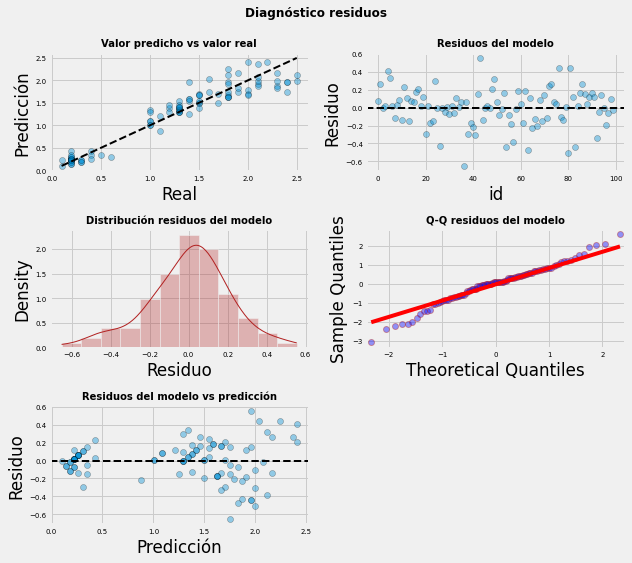

In [240]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print(intervalos_ci)

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)

In [251]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
print(predicciones.head(4))


         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
96   1.377379  0.021977       1.333767       1.420991      0.949421   
105  2.367248  0.040689       2.286502       2.447994      1.933928   
66   1.501113  0.023074       1.455324       1.546901      1.072928   
0    0.222532  0.036884       0.149336       0.295728     -0.209444   

     obs_ci_upper  
96       1.805337  
105      2.800567  
66       1.929297  
0        0.654508  


In [253]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 0.1901365669339087


In [258]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [259]:
# Datos
# ==============================================================================
from sklearn.datasets import load_diabetes
data = load_diabetes()
data1 = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
datos_DT = data1
datos_DT

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [261]:
datos_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  442 non-null    float64
 1   age     442 non-null    float64
 2   sex     442 non-null    float64
 3   bmi     442 non-null    float64
 4   bp      442 non-null    float64
 5   s1      442 non-null    float64
 6   s2      442 non-null    float64
 7   s3      442 non-null    float64
 8   s4      442 non-null    float64
 9   s5      442 non-null    float64
 10  s6      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [263]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X = datos_DT.drop(columns = 'target')
y = datos_DT['target']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )

In [264]:
#Generamos los parametros para hacer una busqueda en grilla de los mejores parametros

model_params = {
    'Decision_Tree_Regressor':{
        'model':DecisionTreeRegressor(),
        'params':{
            'splitter':["best", "random"],        #numero de arboles en el bosque
            'max_depth':[3, 7],             #profundidad maxima del arbol
            'min_samples_split':[10, 50],  #numero minimo de muestras requeridas para dividir un nodo interno
            'min_samples_leaf':[10, 50],   #numero minimo de muestras requeridas para estar en un nodo hoja
            'random_state': [5,10,123],
            'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"]
        }
    }
}

In [265]:
#Hacemos la busqueda en grilla
score = []

for model_name, mp in model_params.items():

  clf=GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
  clf.fit(X_train, y_train)
  
  score.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [266]:
#Vemos cuales fueron los mejores resultados de cada modelo y seleccionamos el mejor
df_score = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
df_score

,model,best_score,best_params
0,Decision_Tree_Regressor,0.384325,"{'criterion': 'squared_error', 'max_depth': 3,..."


In [267]:
# Creación del modelos
# ------------------------------------------------------------------------------

# MODELO BASICO
modelo_tutorial = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# MODELO CON PARAMETROS DE GRILLA
modelo_param1 = DecisionTreeRegressor(
            criterion = 'squared_error',
            max_depth         = 3,
            min_samples_leaf = 10,
            min_samples_split = 5,
            splitter          = 'random',
            random_state      = 123
          )


# Entrenamiento de los modelos
# ------------------------------------------------------------------------------
modelo_tutorial.fit(X_train, y_train)
modelo_param1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=5,
                      random_state=123, splitter='random')

# ESTRUCTURA DE ARBOL

 MODELO TUTORIAL 
Profundidad del árbol: 3
Número de nodos terminales: 8
 MODELO PARAM1 
Profundidad del árbol: 3
Número de nodos terminales: 6


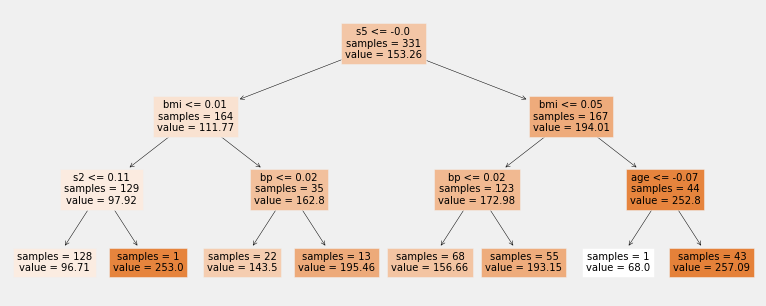

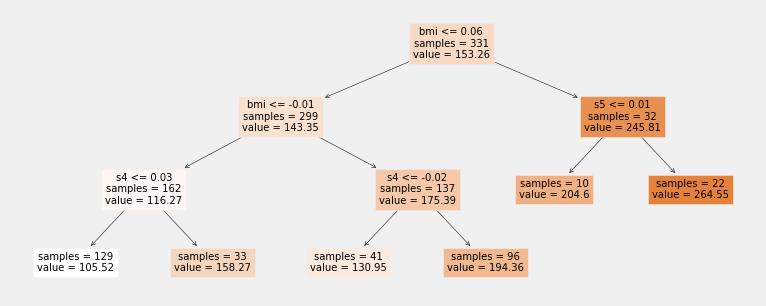

In [268]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
print(" MODELO TUTORIAL ")
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_tutorial.get_depth()}")
print(f"Número de nodos terminales: {modelo_tutorial.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_tutorial,
            feature_names = X.columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
# Estructura del árbol creado
# ------------------------------------------------------------------------------
print(" MODELO PARAM1 ")
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_param1.get_depth()}")
print(f"Número de nodos terminales: {modelo_param1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_param1,
            feature_names = X.columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

# IMPORTANCIA DE PREDICTORES

In [269]:
print( "MODELO TUROTIAL")
importancia_predictores_tuto = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_tutorial.feature_importances_}
                            )
print("Importancia de los predictores en el modelo_tutorial")
print("-------------------------------------------")
print(importancia_predictores_tuto.sort_values('importancia', ascending=False))

print( "MODELO PARAM1")
importancia_predictores_param = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_param1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo_param")
print("-------------------------------------------")
importancia_predictores_param.sort_values('importancia', ascending=False)

MODELO TUROTIAL
Importancia de los predictores en el modelo_tutorial
-------------------------------------------
  predictor  importancia
8        s5     0.557553
2       bmi     0.321175
3        bp     0.062308
0       age     0.034816
5        s2     0.024148
1       sex     0.000000
4        s1     0.000000
6        s3     0.000000
7        s4     0.000000
9        s6     0.000000
MODELO PARAM1
Importancia de los predictores en el modelo_param
-------------------------------------------


,predictor,importancia
2,bmi,0.725139
7,s4,0.243035
8,s5,0.031826
0,age,0.000000
1,sex,0.000000
3,bp,0.000000
4,s1,0.000000
5,s2,0.000000
6,s3,0.000000
9,s6,0.000000


# PREDICCION Y EVALUACION DE LOS MODELOSS

In [270]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
print(" PREDICCIONES TUTO")
predicciones_tuto = modelo_tutorial.predict(X = X_test)

squared_error_tuto = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_tuto,
        squared = False
       )
print(f"El error (squared_error) de test es: {squared_error_tuto}")

print(" PREDICCIONES PARAM1 ")

predicciones_param1 = modelo_param1.predict(X = X_test)

squared_error_param1 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_param1,
        squared = False
       )
print(f"El error (squared_error) de test es: {squared_error_param1}")

 PREDICCIONES TUTO
El error (squared_error) de test es: 65.15116594887334
 PREDICCIONES PARAM1 
El error (squared_error) de test es: 59.25922514225752


===============================================================================